# Importamos las librerías

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


# Análisis de la primera planta de generación de energía

In [11]:
data= pd.read_csv("../data/dataset_completo.csv")
#data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
#data["Month"]=data["Date"].dt.month
#data.columns

In [12]:
data

,Year,Month,Day,Hour,Power(MW),Minute,Temperature,Clearsky GHI,DHI,Clearsky DHI,...,Cloud Type,DNI,Relative Humidity,Pressure,Wind Speed,Global Horizontal UV Irradiance (295-385nm),Global Horizontal UV Irradiance (280-400nm),Solar Zenith Angle,Dew Point,Surface Albedo
0,2006,1,1,0,0.0,30,20.5,0,0,0,...,7,0,95.57,936,1.7,0.0000,0.0000,120.97,19.8,0.18
1,2006,1,1,1,0.0,30,20.2,0,0,0,...,6,0,96.03,935,1.9,0.0000,0.0000,130.11,19.5,0.18
2,2006,1,1,2,0.0,30,19.9,0,0,0,...,6,0,96.84,935,2.2,0.0000,0.0000,136.17,19.4,0.18
3,2006,1,1,3,0.0,30,19.6,0,0,0,...,7,0,97.90,934,2.4,0.0000,0.0000,137.79,19.3,0.18
4,2006,1,1,4,0.0,30,19.4,0,0,0,...,7,0,98.89,934,2.4,0.0000,0.0000,134.49,19.2,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2006,12,31,19,0.0,30,24.4,507,223,93,...,2,346,86.04,935,2.0,17.6351,22.5576,58.18,21.9,0.18
8756,2006,12,31,20,0.0,30,23.5,267,123,72,...,3,260,93.55,935,1.5,7.9844,10.3340,71.69,22.4,0.18
8757,2006,12,31,21,0.0,30,22.6,53,31,31,...,7,245,98.91,935,1.4,0.0000,0.0000,84.85,22.4,0.18
8758,2006,12,31,22,0.0,30,22.2,0,0,0,...,7,0,99.19,935,1.8,0.0000,0.0000,97.82,22.1,0.18


In [11]:
#data.describe().to_csv("../data/estadistica_raw.csv")

Las columnas de este Dataset son las siguientes:
1. DATE_TIME: Las observaciones se realizan cada 15 minutos
2. DV_POWER: Cantidad de energía DC generada por el inversor en el intervalo de 15 minutos
3. AC_POWER: Cantidad de energía generada por el inversor en el intervalo de 15 minutos
4. DAYLY_YIELD: Suma cumulativa de energía generada en el día hasta el punto en que está siendo registrada

# Análisis exploratorio

En este parte del análisis vamos a realizar una comparación de las variables más imnportantes del proceso

In [4]:
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'Dew Point',
       'Surface Albedo', 'Wind Speed', 'Relative Humidity', 'Temperature',
       'Pressure', 'Cloud Type', 'GHI', 'Solar Zenith Angle',
       'Precipitable Water'],
      dtype='object')

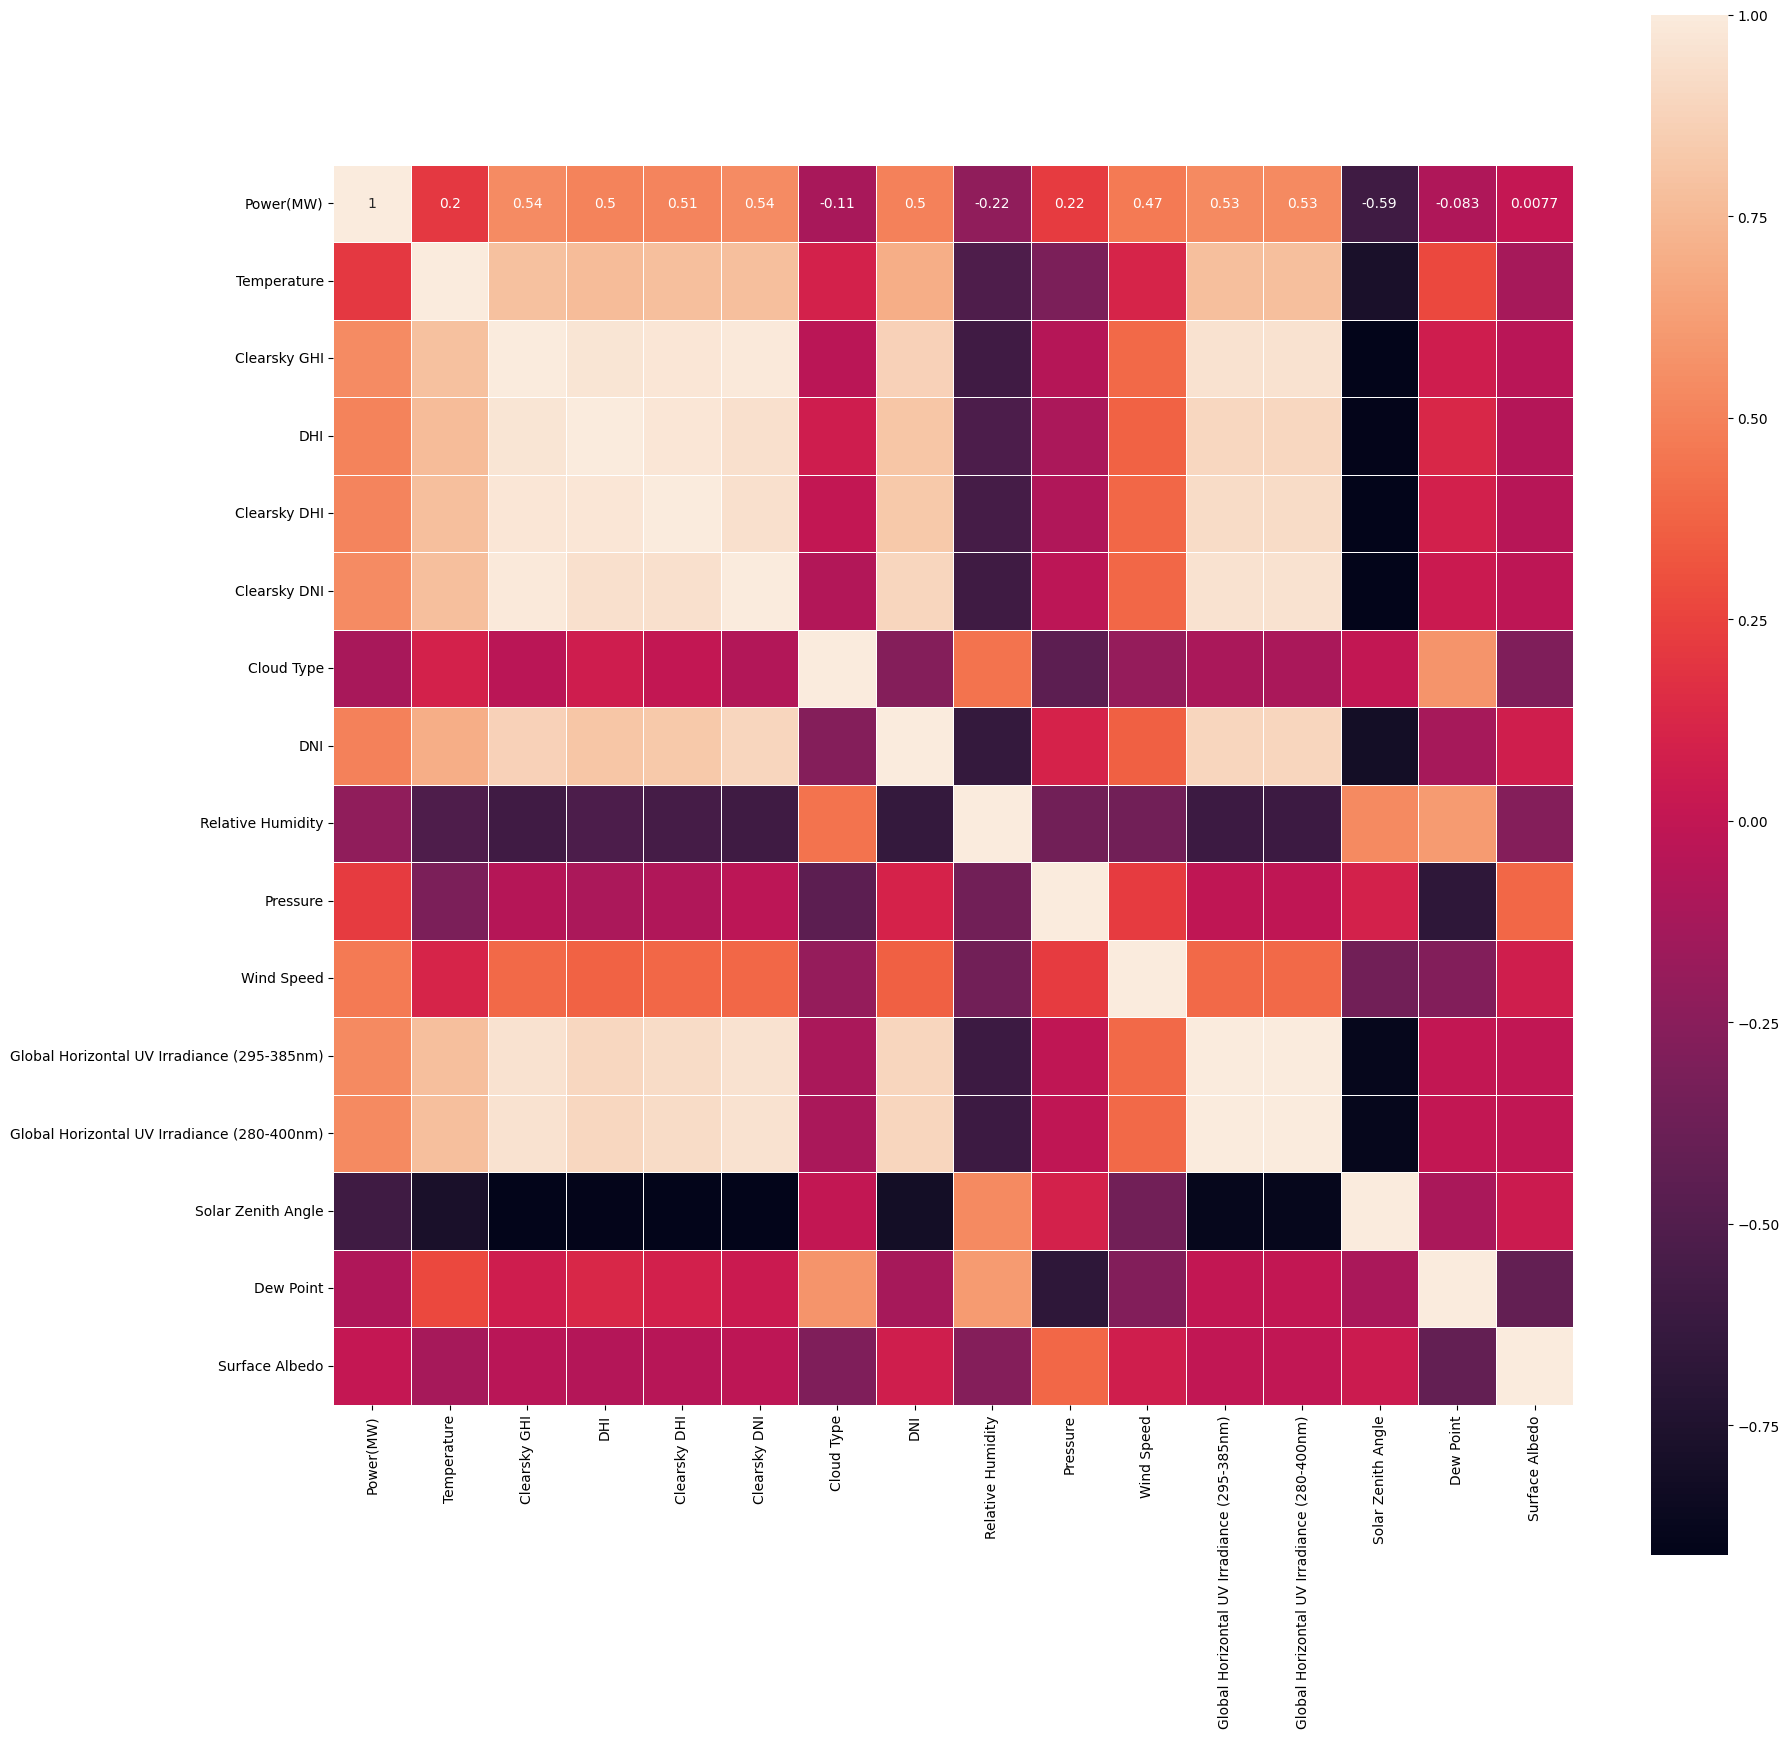

In [17]:
corr = data.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute']).corr(method = 'spearman')
plt.figure(figsize=(20, 20))
sns.heatmap(corr, robust=True, annot=True, linewidths=.5, square=True)
plt.show()


En el mapa de correlaciones se puede obervar que existe una alta correlación entre el únto de rocío y ka temperatura del ambiente. Al igual que hay una correlación entre el altímetro y la presión 

Análisis entre la hora del día y la generación de energía

In [13]:
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Power(MW)', 'Minute', 'Temperature',
       'Clearsky GHI', 'DHI', 'Clearsky DHI', 'Clearsky DNI', 'Cloud Type',
       'DNI', 'Relative Humidity', 'Pressure', 'Wind Speed',
       'Global Horizontal UV Irradiance (295-385nm)',
       'Global Horizontal UV Irradiance (280-400nm)', 'Solar Zenith Angle',
       'Dew Point', 'Surface Albedo'],
      dtype='object')

/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: xlabel='Hour', ylabel='Power(MW)'>

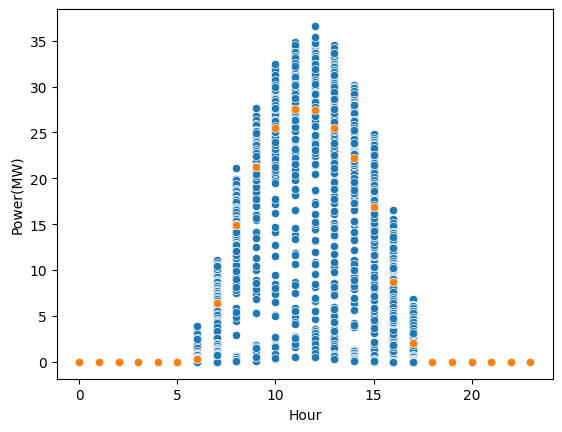

In [19]:
promedio_generacion_hora=data.groupby(["Hour"])["Power(MW)"].mean()
sns.scatterplot(data, x="Hour", y="Power(MW)")
sns.scatterplot(promedio_generacion_hora, markers="-")

In [8]:
data

,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,(Inverter),Month
0,2016-01-31,24,0.0,5.00,1.40,0.89,95.56,9.00,29.10,29.89,0.0,NaN,1
1,2016-02-01,1,0.0,7.88,1.16,0.62,91.04,7.04,29.11,29.90,0.0,NaN,2
2,2016-02-01,2,0.0,9.84,1.22,0.96,89.28,8.96,29.12,29.91,0.0,NaN,2
3,2016-02-01,3,0.0,9.84,1.02,0.61,89.12,6.36,29.14,29.93,0.0,NaN,2
4,2016-02-01,4,0.0,9.88,0.83,0.45,90.08,6.12,29.15,29.94,0.0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15067,2017-10-28,19,1.0,10.00,3.17,-1.17,72.68,6.12,29.18,29.97,0.0,NaN,10
15068,2017-10-28,20,1.0,10.00,2.99,-0.24,81.41,6.44,29.18,29.97,0.0,NaN,10
15069,2017-10-28,21,1.0,10.00,2.98,-0.68,78.09,5.81,29.18,29.97,0.0,NaN,10
15070,2017-10-28,22,1.0,10.00,2.98,-1.16,75.24,4.92,29.17,29.96,0.0,NaN,10


In [20]:
sns.pairplot(data, hue="Month")

/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


# Análisis de la influencia de las condiciones climáticas

Análisis del mes

In [10]:
generacion_temperatura=data.groupby(["Hour", "Month", "Visibility", "Cloud coverage"])["Solar energy"].mean().reset_index()

In [11]:
generacion_temperatura

,Hour,Month,Visibility,Cloud coverage,Solar energy
0,1,1,0.33,1.00,0.0
1,1,1,2.27,1.00,0.0
2,1,1,2.58,1.00,0.0
3,1,1,2.98,1.00,0.0
4,1,1,3.04,0.00,0.0
...,...,...,...,...,...
7461,24,12,10.00,0.00,0.0
7462,24,12,10.00,0.11,0.0
7463,24,12,10.00,0.44,0.0
7464,24,12,10.00,0.67,0.0


/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Hour', ylabel='Solar energy'>

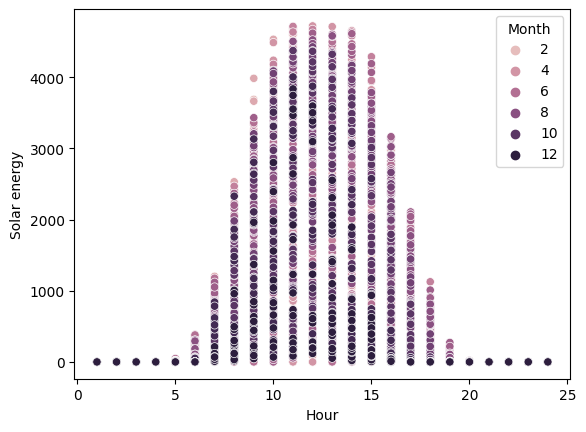

In [12]:
sns.scatterplot(generacion_temperatura, x="Hour", y= "Solar energy", hue="Month")

Al realizar un análsis de la influencia de la temperatura con la generación de energía no se nota una dependencia muy fuerte entre estas dos

/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Temperature', ylabel='Solar energy'>

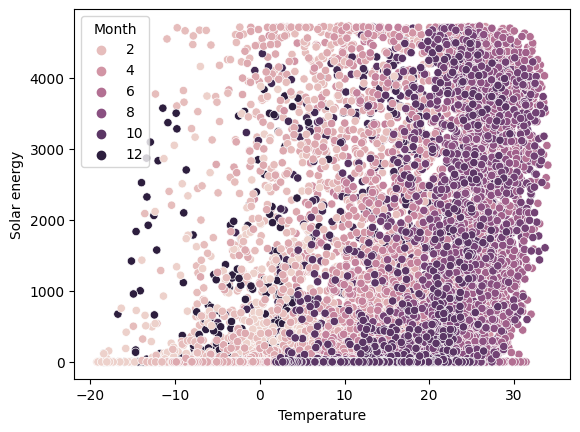

In [13]:
sns.scatterplot(data, y="Solar energy", x= "Temperature", hue="Month")

# Extracción de las características más importantes

In [14]:
data.columns

Index(['Date', 'Hour', 'Cloud coverage', 'Visibility', 'Temperature',
       'Dew point', 'Relative humidity', 'Wind speed', 'Station pressure',
       'Altimeter', 'Solar energy', '(Inverter)', 'Month'],
      dtype='object')

In [15]:
prepared_data=data[['Date', 'Hour', 'Cloud coverage', 'Visibility', 'Temperature', 'Dew point', 'Relative humidity', 'Wind speed', 'Solar energy' ]]